# Insurance Claims- Fraud Detection

## Problem Statement

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

### Importing Libraries

In [61]:
import pandas as pd # for handling dataset
import numpy as np  # for mathematical computation

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from scipy.stats import skew

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

In [62]:
# reading the data
df=pd.read_csv(r'D:\DATATRAINED\DTRND-Project\EVALUATION\3rd week\Automobile_insurance_fraud.csv') 

In [63]:
df.head() # to display top 5 rows from dataset

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


#### There is '?' symbol in police report available column, so we will check for every column later 

In [64]:
print('Total no of rows & columns: ',df.shape) # to check number of rows & columns

Total no of rows & columns:  (1000, 40)


In [65]:
print('List of columns: ',df.columns) # to display all the columns name in the dataset

List of columns:  Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')


In [66]:
df.info() # to know datatype of each columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [67]:
# to count number of unique values in each columns 
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [68]:
# to list categorical features in our dataset
cat_features=[i for i in df.columns if df.dtypes[i]=='object']
cat_features

['policy_bind_date',
 'policy_state',
 'policy_csl',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [69]:
# to list continous features in our dataset
con_features=[i for i in df.columns if df.dtypes[i]=='int64' or df.dtypes[i]=='float64']
con_features

['months_as_customer',
 'age',
 'policy_number',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_year',
 '_c39']

In [70]:
df.describe() # to get high understanding of dataset or to get overview/stats of the dataset

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


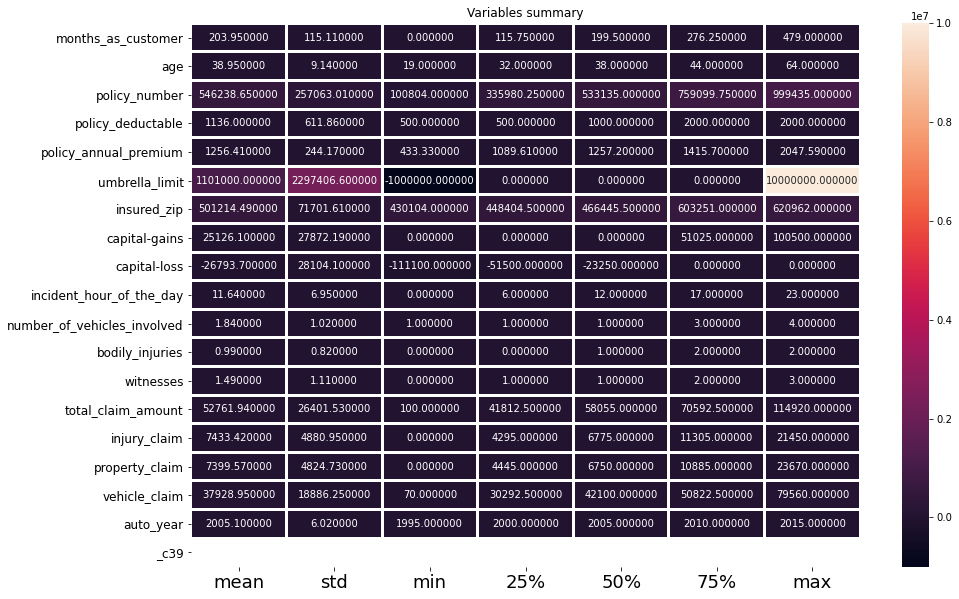

In [71]:
plt.figure(figsize=(15,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

#### From the above plotting we are determining mean, standard deviation, minimum and maximum values of above columns. It helps us further in data cleaning.

In [72]:
# replacing '?' with null
df = df.replace('?',np.NaN)

In [73]:
df.isnull().sum()  # to check null values

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

#### Null values present in dataset.

### Treating Null Values

In [74]:
# dropping column as it is containing 100% null values
df=df.drop(columns='_c39')

In [75]:
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])

In [76]:
# Cases might be there that there are no responses for property damage then we might take it as No property damage.
df['property_damage']=df['property_damage'].fillna('NO')

# again, if there are no responses for police report available then we might take it as No report available
df['police_report_available']=df['police_report_available'].fillna('NO')

In [77]:
df.isnull().sum()  # to check again for null values 

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

#### No null values in dataset now.

In [78]:
# to change format
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['policy_bind_date']

0     2014-10-17
1     2006-06-27
2     2000-06-09
3     1990-05-25
4     2014-06-06
         ...    
995   1991-07-16
996   2014-05-01
997   2003-02-17
998   2011-11-18
999   1996-11-11
Name: policy_bind_date, Length: 1000, dtype: datetime64[ns]

In [79]:
# splitting policy_bind_date into Year,Month and Day
df['Policy year']=df['policy_bind_date'].dt.year
df['Policy month']=df['policy_bind_date'].dt.month
df['Policy day']=df['policy_bind_date'].dt.day

In [80]:
# dropping 'Date' column
df=df.drop('policy_bind_date',axis=1)

In [81]:
# to change format
df['incident_date']=pd.to_datetime(df['incident_date'])
df['incident_date']

0     2015-01-25
1     2015-01-21
2     2015-02-22
3     2015-10-01
4     2015-02-17
         ...    
995   2015-02-22
996   2015-01-24
997   2015-01-23
998   2015-02-26
999   2015-02-26
Name: incident_date, Length: 1000, dtype: datetime64[ns]

#### Single year 2015 only shown, so we will split only month and day

In [82]:
# splitting incident_date into Month and Day
df['Incident month']=df['incident_date'].dt.month
df['Incident day']=df['incident_date'].dt.day

In [83]:
# dropping 'Date' column
df=df.drop('incident_date',axis=1)

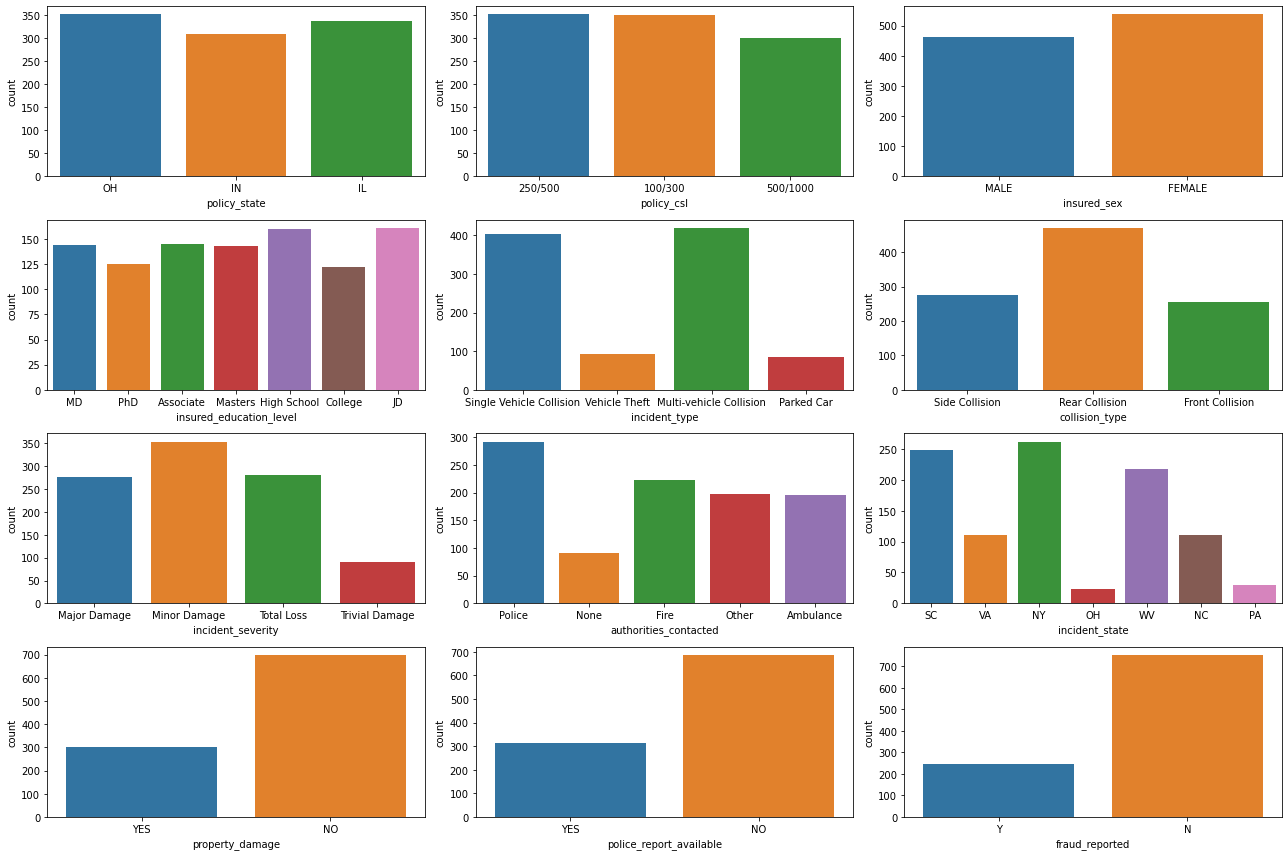

In [92]:
# Univariate Analysis
fig,ax = plt.subplots(4,3,figsize=(18,12))

sns.countplot('policy_state',data=df,ax=ax[0][0])
sns.countplot('policy_csl',data=df,ax=ax[0][1])
sns.countplot('insured_sex',data=df,ax=ax[0][2])

sns.countplot('insured_education_level',data=df,ax=ax[1][0])
sns.countplot('incident_type',data=df,ax=ax[1][1])
sns.countplot('collision_type',data=df,ax=ax[1][2])

sns.countplot('incident_severity',data=df,ax=ax[2][0])
sns.countplot('authorities_contacted',data=df,ax=ax[2][1])
sns.countplot('incident_state',data=df,ax=ax[2][2])

sns.countplot('property_damage',data=df,ax=ax[3][0])
sns.countplot('police_report_available',data=df,ax=ax[3][1])
sns.countplot('fraud_reported',data=df,ax=ax[3][2])

plt.tight_layout()

#### Inferences from above plot

1. All three States of USA (Ohio,Illinois and Indiana) has policy holders in the range of 30-35%.
2. Mostly policy holders have taken coverage limit of (250/500) & (100/300) for bodily injury and property damage.
3. Female claims for vehicle insurance is more than men.
4. Highscool passout and doctor of law are the major persons who claimed for Insurance.
5. For insurance claim, most of them has reported multi-vehicle collision.
6. For most of vehicle, the type of collision is Rear Collision.
7. Most of the time, the incident severity was minor damage.
8. In most cases police is contacted first.
9. Majority of accident took place in New York and then followed by South Carolina state in USA, 
    Ohio is having the least incident/accident count.
10. Only 30% have claimed for property damage.
11. According to stats, only 31% police reports available.
12. Approx 25% Insurance fraud has been reported.

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

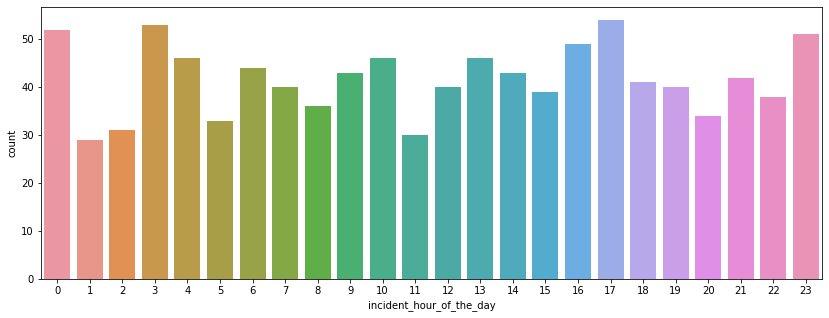

In [93]:
plt.subplots(figsize=(14,5))
sns.countplot(x='incident_hour_of_the_day', data=df)

#### Accidents is happening on regular intervals but from noon till midnight there is steep rise of incidents taking place.

### Bivariate Analysis

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

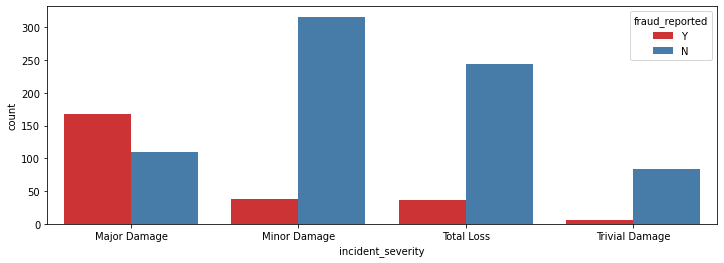

In [94]:
plt.subplots(figsize=(12,4))
sns.countplot(x='incident_severity',hue='fraud_reported', data=df,palette='Set1')

1. Lots of fraud insurance claims has been reported in Major Damage .
2. In Minor Damage, least cases of fraud insurance claim is reported.

<AxesSubplot:xlabel='incident_type', ylabel='count'>

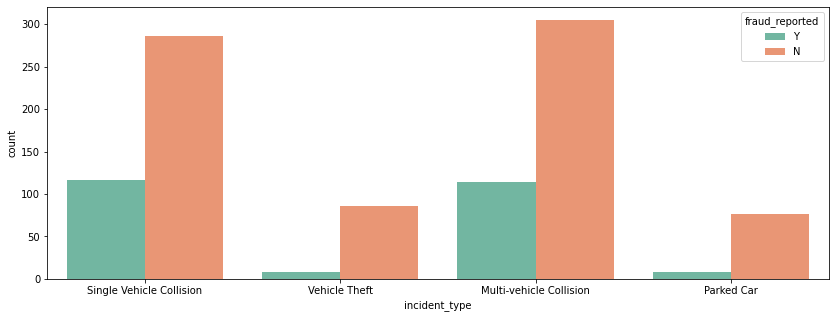

In [95]:
plt.subplots(figsize=(14,5))
sns.countplot(x='incident_type',hue='fraud_reported', data=df,palette='Set2')

#### Mostly fraud insurance claim has been reported for Single & Multi vehicle collision.

<AxesSubplot:xlabel='incident_state', ylabel='count'>

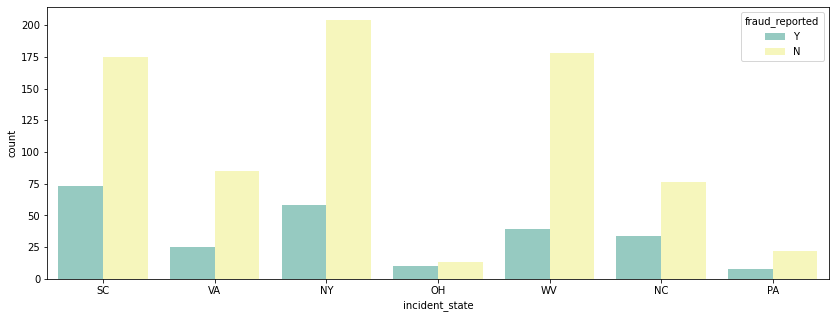

In [96]:
plt.subplots(figsize=(14,5))
sns.countplot(x='incident_state',hue='fraud_reported', data=df,palette='Set3')

#### Mostly fraud insurance claim has been reported in the state South Carolina (SC) of USA.

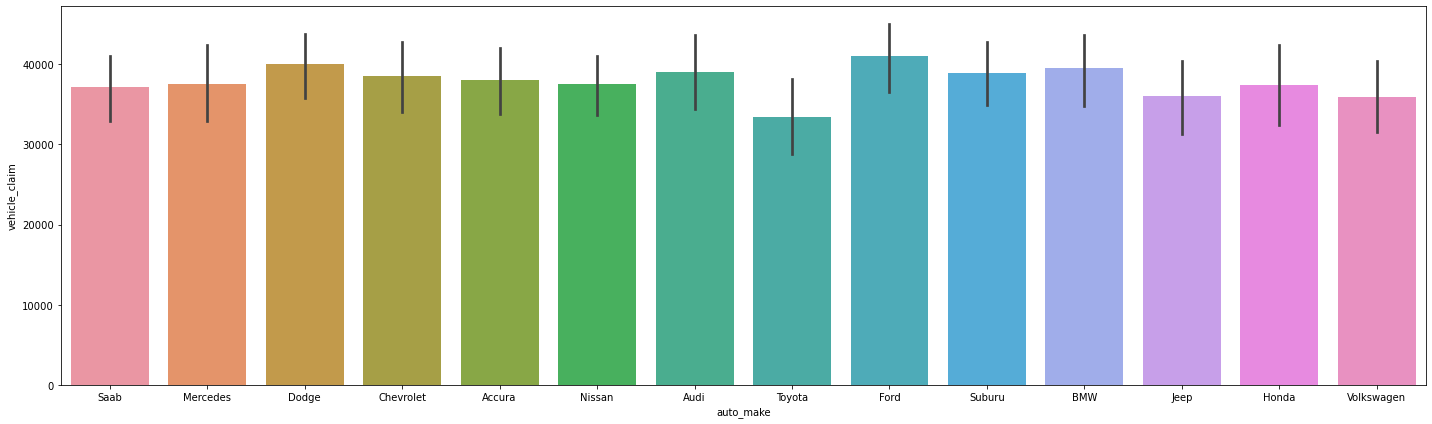

In [97]:
plt.subplots(figsize=(20,6))
sns.barplot(x='auto_make',y='vehicle_claim',data=df)
plt.tight_layout()

1. Mostly vehicle claim has been made for Dodge and Ford cars.
2. For Toyota car it has been least.

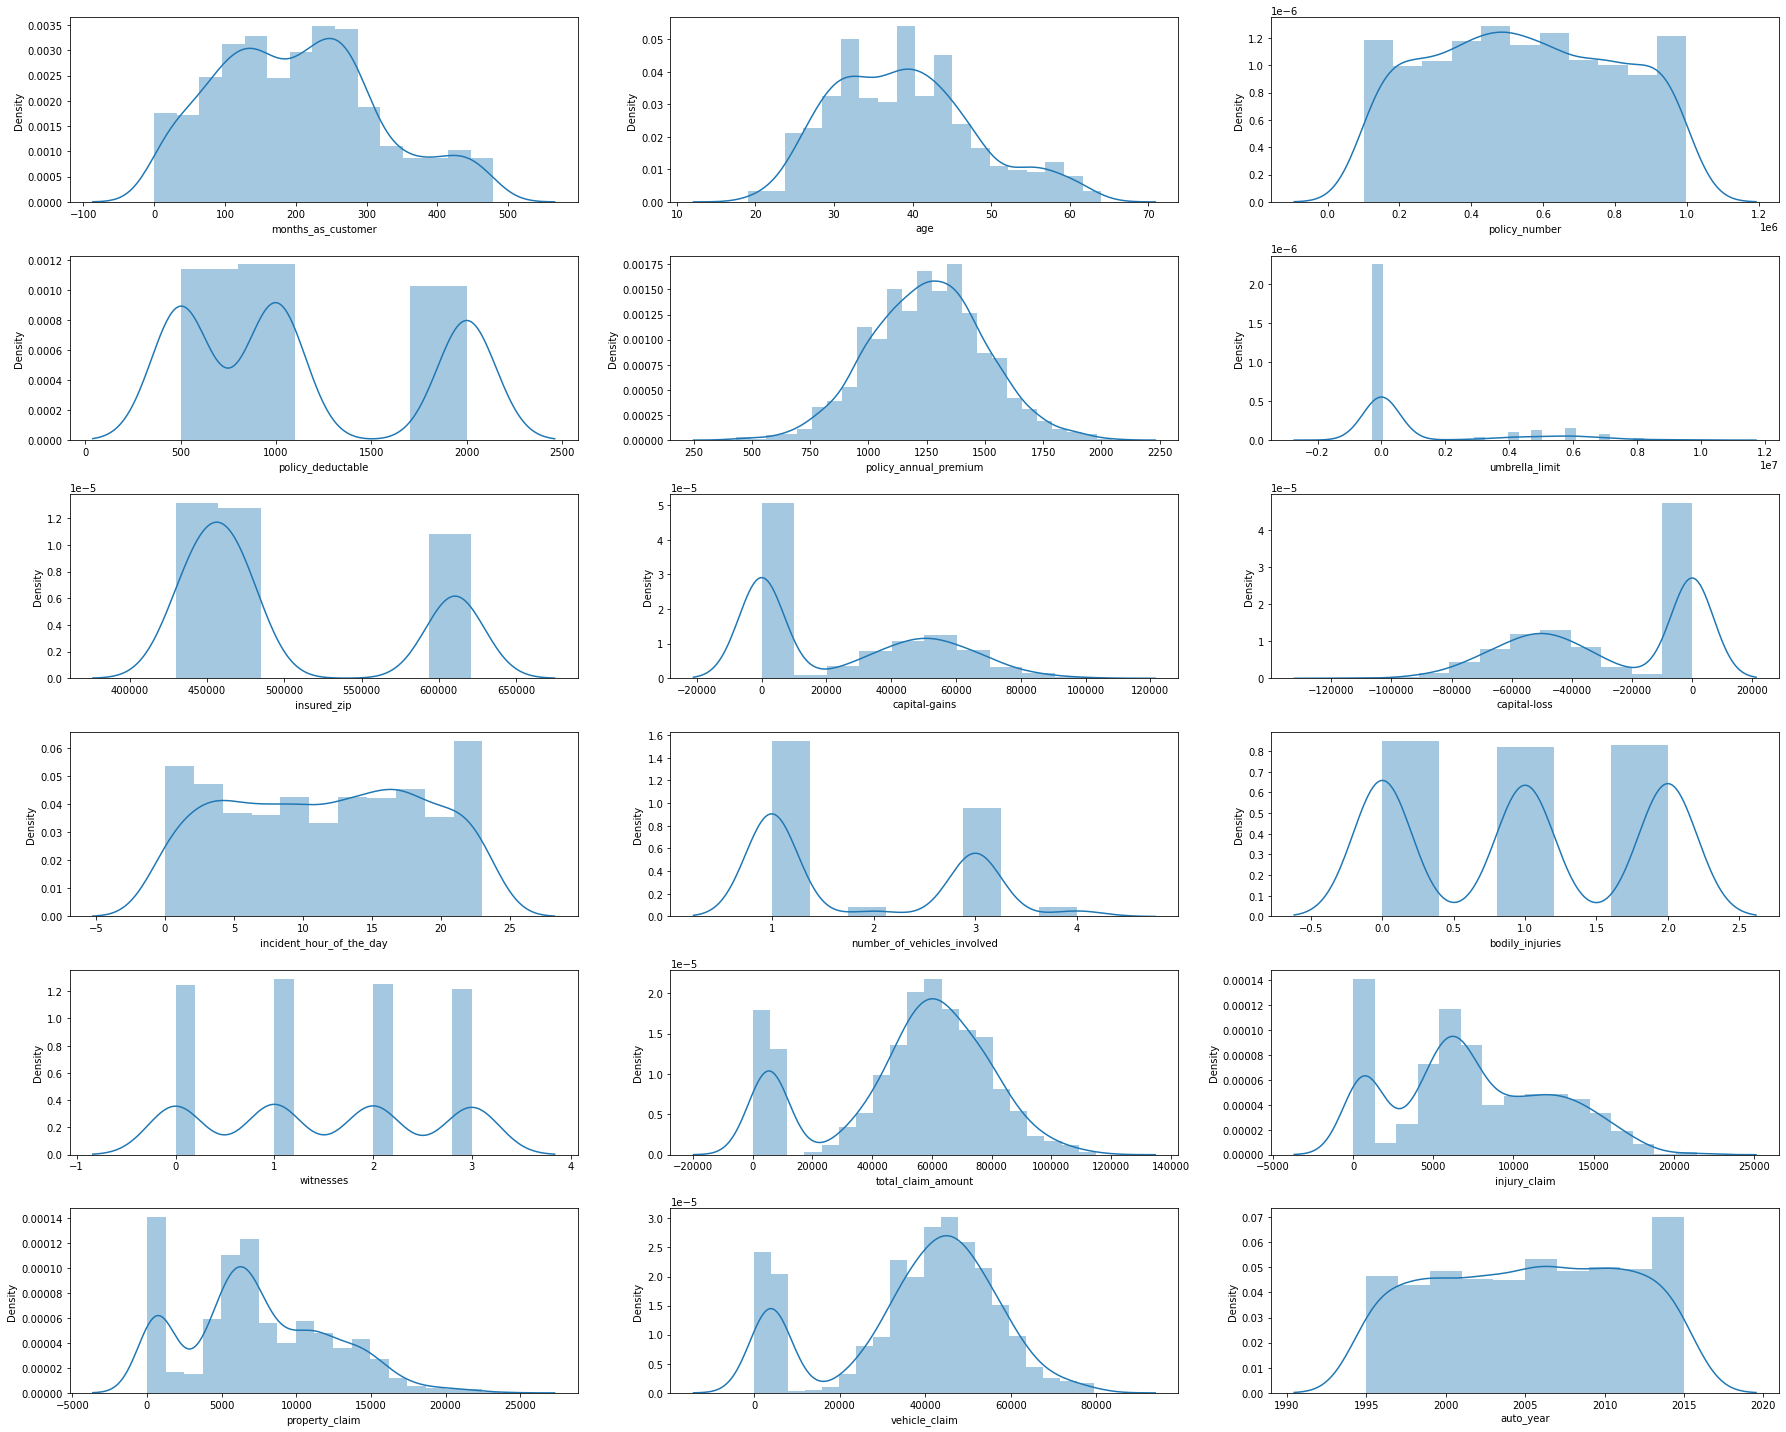

In [98]:
# to visualize data distribution 
plt.figure(figsize=(25,20), facecolor='white')
plotnumber=1
for column in con_features:
    if plotnumber<=18:
        ax=plt.subplot(6,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

#### Skewness can be seen in property claim, injury claim,umbrella limit and total claim amount.

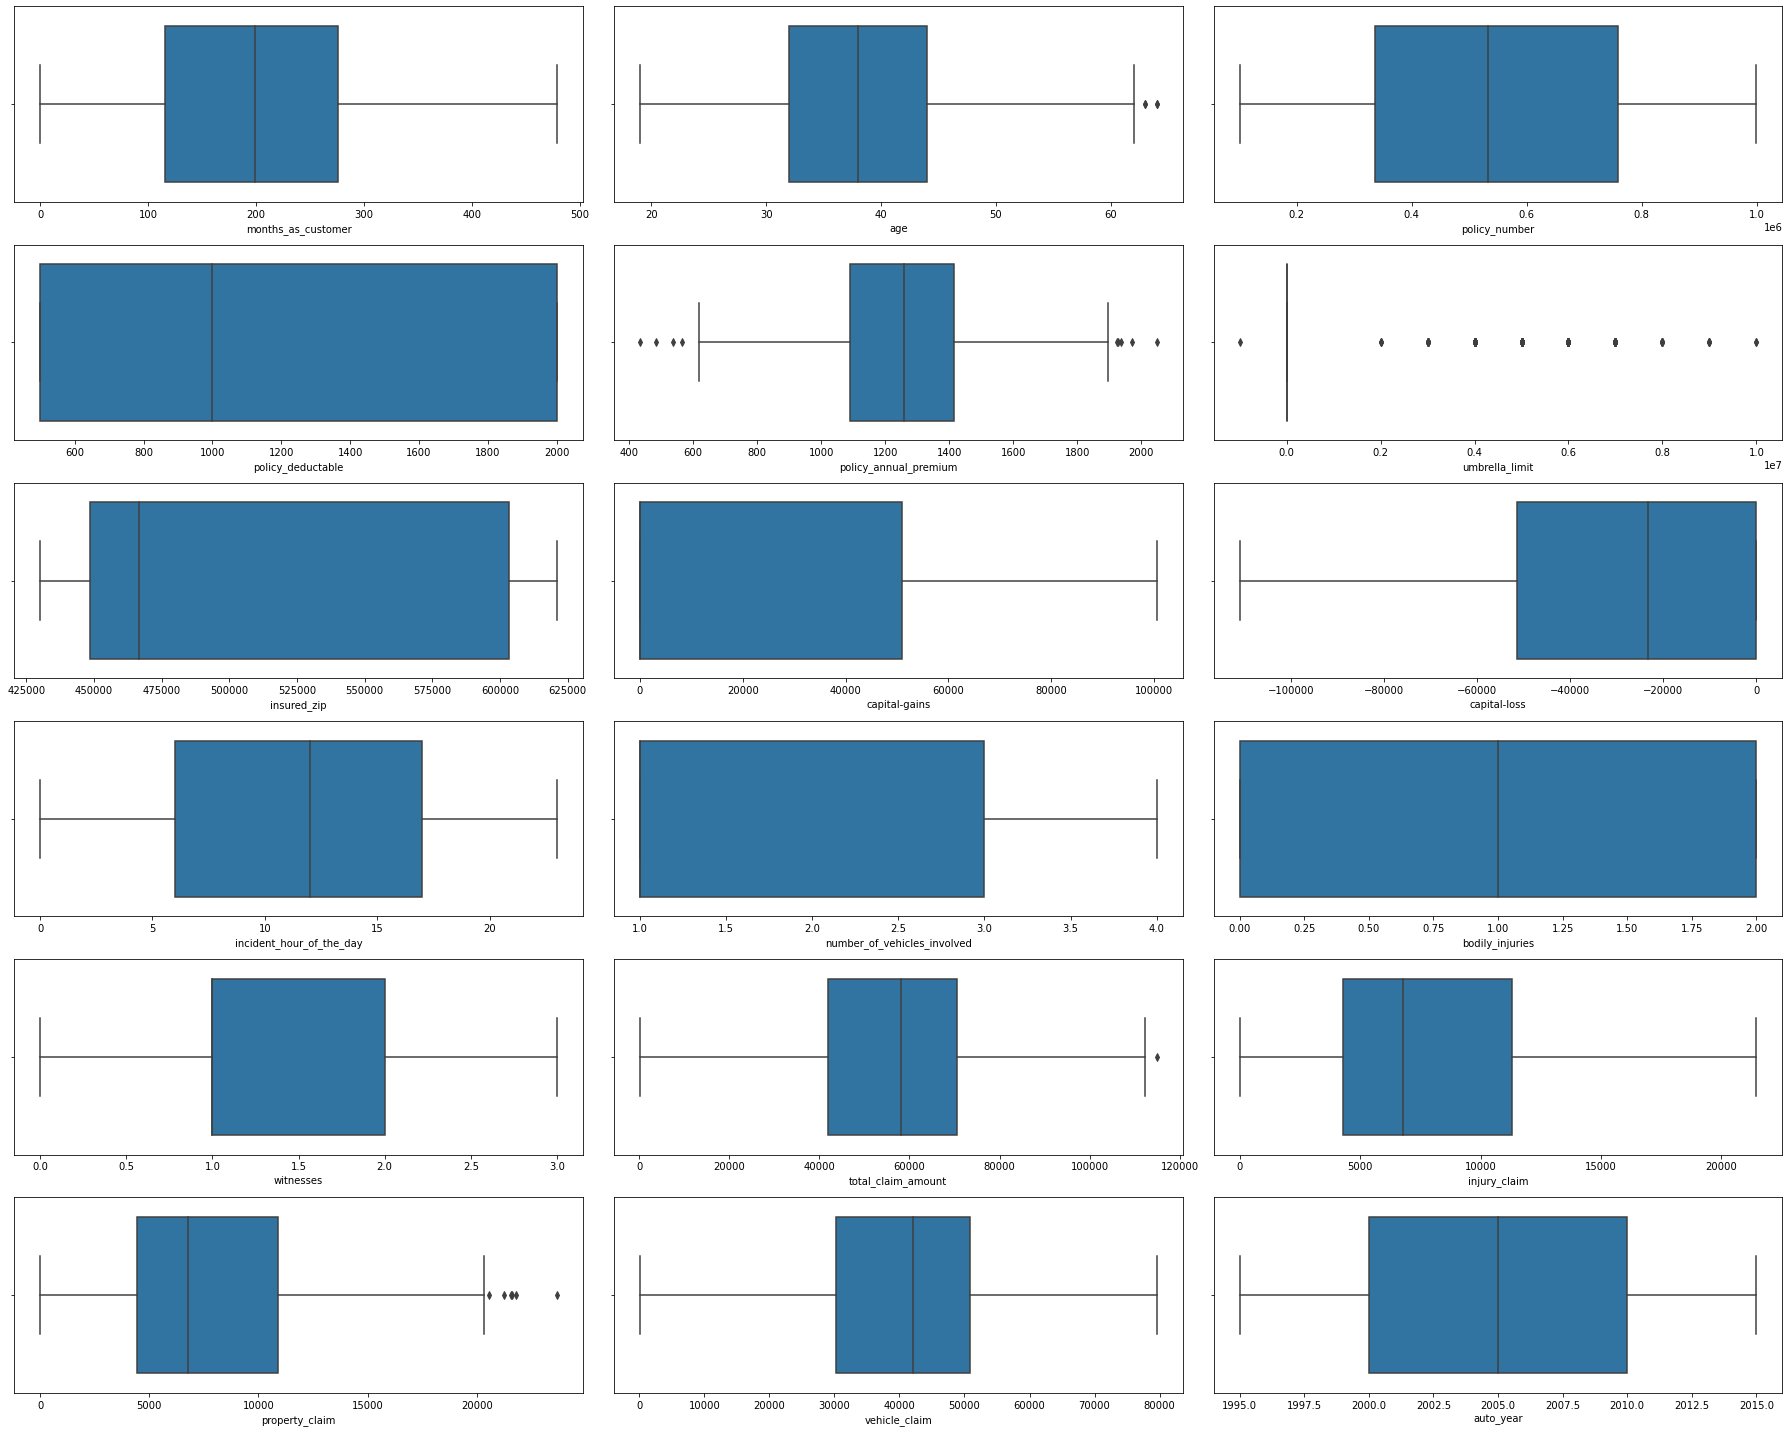

In [99]:
# Lets visualize the columns in boxplot to check outliers
plt.figure(figsize=(25,20))
plot=1
for col in con_features:
    if plot<=18:
        plt.subplot(6,3,plot)
        sns.boxplot(df[col])
        plt.xlabel(col)
        plot=plot+1
plt.tight_layout()

#### Outliers are present in age,policy_annual_premium, umbrella_limit, total_claim_amount, property_claim

In [100]:
# Using 1.5 IQR method to remove outliers

IQR=df.age.quantile(0.75) - df.age.quantile(0.25)
lowerbridge = df['age'].quantile(0.25)-(IQR*1.5)
upperbridge = df['age'].quantile(0.75)+(IQR*1.5)
print('Lower bridge is',lowerbridge)
print('Upper bridge is',upperbridge)

Lower bridge is 14.0
Upper bridge is 62.0


In [101]:
df.loc[df['age']>62,'age'] = 62
df.loc[df['age']<14,'age'] = 14

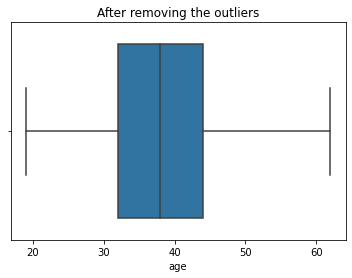

In [102]:
sns.boxplot(df['age'])
plt.title('After removing the outliers')
plt.show()

In [103]:
IQR=df.policy_annual_premium.quantile(0.75) - df.policy_annual_premium.quantile(0.25)
lowerbridge = df['policy_annual_premium'].quantile(0.25)-(IQR*1.5)
upperbridge = df['policy_annual_premium'].quantile(0.75)+(IQR*1.5)
print('Lower bridge is',lowerbridge)
print('Upper bridge is',upperbridge)

Lower bridge is 600.4762500000003
Upper bridge is 1904.8262499999996


In [104]:
df.loc[df['policy_annual_premium']>1904.8262499999996,'policy_annual_premium'] = 1904.8262499999996
df.loc[df['policy_annual_premium']<600.4762500000003,'policy_annual_premium'] = 600.4762500000003

In [105]:
IQR = df.total_claim_amount.quantile(0.75) - df.total_claim_amount.quantile(0.25)
lowerbridge=df['total_claim_amount'].quantile(0.25)-(IQR*1.5)
upperbridge=df['total_claim_amount'].quantile(0.75)+(IQR*1.5)
print('Lower bridge is',lowerbridge)
print('Upper bridge is',upperbridge)

Lower bridge is -1357.5
Upper bridge is 113762.5


In [106]:
df.loc[df['total_claim_amount']>113762.5,'total_claim_amount'] =  113762.5

In [107]:
IQR=df.property_claim.quantile(0.75) - df.property_claim.quantile(0.25)
lowerbridge = df['property_claim'].quantile(0.25)-(IQR*1.5)
upperbridge = df['property_claim'].quantile(0.75)+(IQR*1.5)
print('Lower bridge is',lowerbridge)
print('Upper bridge is',upperbridge)

Lower bridge is -5215.0
Upper bridge is 20545.0


In [108]:
df.loc[df['property_claim']>20545,'property_claim'] = 20545

In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
# converting objects into integers
lab_enc = LabelEncoder()
list1 = ['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation',
          'insured_hobbies','insured_relationship','incident_type','collision_type',
         'incident_severity','authorities_contacted','incident_state','incident_city','incident_location',
         'property_damage','police_report_available','auto_make','auto_model','fraud_reported']
for val in list1:
    df[val] = lab_enc.fit_transform(df[val].astype(str))

In [111]:
# checking if all features has transformed into machine language
df.head()

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy year,Policy month,Policy day,Incident month,Incident day
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,52080,10,1,2004,1,2014,10,17,1,25
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,3510,8,12,2007,1,2006,6,27,1,21
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,23100,4,30,2007,0,2000,6,9,2,22
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,50720,3,34,2014,1,1990,5,25,10,1
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,4550,0,31,2009,0,2014,6,6,2,17


In [112]:
# to see skewness for every continous column stored in data_new
df.skew()

months_as_customer             0.362177
age                            0.469878
policy_number                  0.038991
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.016003
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664


#### Not extereme skewness is found and rest are categorical data.

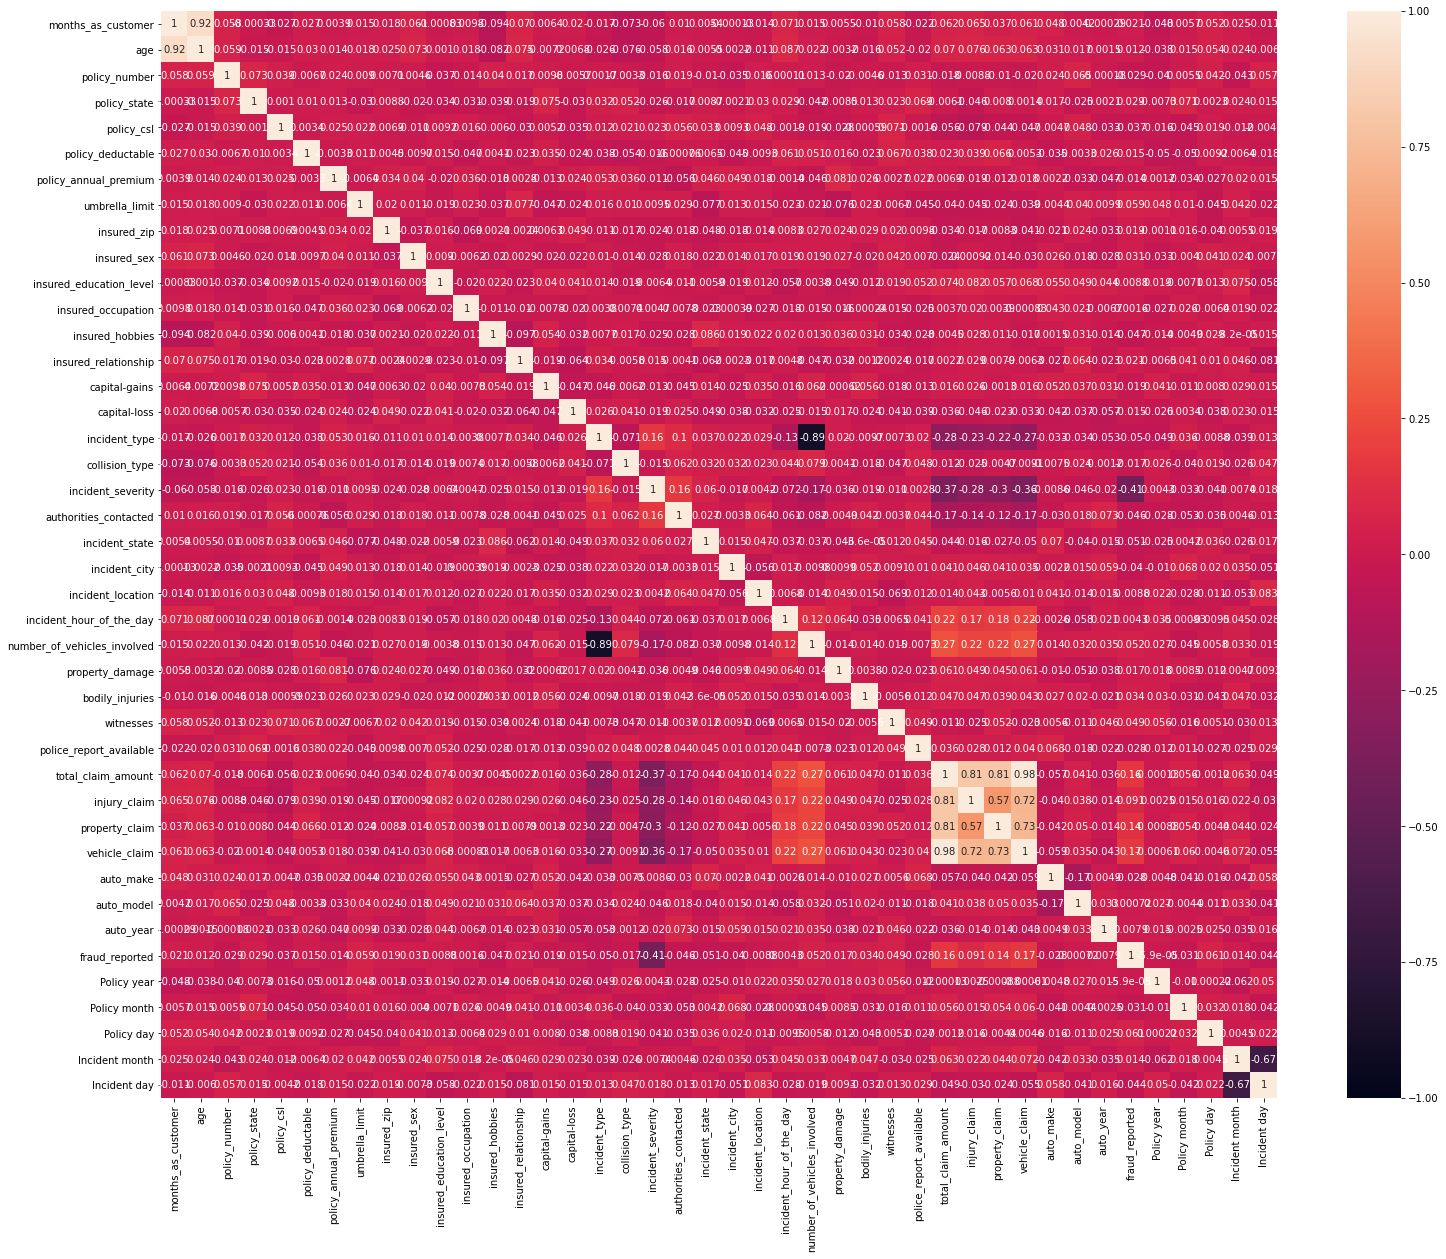

In [113]:
# plotting heatmap to observe the correlation
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

In [114]:
y = df['fraud_reported']
X = df.drop('fraud_reported', axis = 1)

In [115]:
# Data Scaling.  Formula Z=(x-mean)/std
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range (X_scaled.shape[1])]
vif["features"] = X.columns

#let's check the values
vif

,vif,features
0,6.895801,months_as_customer
1,6.880120,age
2,1.034121,policy_number
3,1.046709,policy_state
4,1.038173,policy_csl
5,1.045917,policy_deductable
6,1.044510,policy_annual_premium
7,1.039534,umbrella_limit
8,1.032485,insured_zip
9,1.030569,insured_sex


In [117]:
## Multicollinearity problem exists. Total_claim_amount and vehicle_claim are higly co-related with each other.

In [118]:
df=df.drop(columns='total_claim_amount')

In [119]:
# Split data into train and test. Model will be built on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state = 101)

## Logistic Regression

In [120]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [121]:
y_pred = log_reg.predict(x_test)

In [122]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.796

In [123]:
# Cross Validation score to check if the model is overfitting
score= cross_val_score(log_reg,X,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.75  0.755 0.74  0.755 0.755]
0.751
0.0058309518948453055


In [124]:
# Confusion Matrix
conf_mat =confusion_matrix(y_test,y_pred)
conf_mat

array([[181,  22],
       [ 29,  18]], dtype=int64)

In [125]:
print('\n----------------Classification Report-------------------')
print (classification_report(y_test,y_pred,digits=2))


----------------Classification Report-------------------
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       203
           1       0.45      0.38      0.41        47

    accuracy                           0.80       250
   macro avg       0.66      0.64      0.65       250
weighted avg       0.78      0.80      0.79       250



## DecisionTreeClassifier

In [126]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
pred=dt_clf.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = dt_clf.predict(x_test)  
dt_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 100.00%
______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    550.0  200.0       1.0      750.0         750.0
______________________________________________
Confusion Matrix:
 [[550   0]
 [  0 200]]


===================Test Result======================
Accuracy Score: 81.60%
______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.924324   0.507692     0.816    0.716008      0.845998
recall       0.842365   0.702128     0.816    0.772246      0.816000
f1-score     0.881443   0.589286     0.816    0.735365      0.826518
support    203.000000  47.000000     0.816 

In [127]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(dt_clf,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.765 0.735 0.78  0.795 0.81 ]
0.777
0.025806975801127903


## Random Forest Classifier

In [128]:
rand_clf = RandomForestClassifier(random_state=101)
rand_clf.fit(x_train,y_train)
pred=dt_clf.predict(x_train)
rand_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{rand_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = rand_clf.predict(x_test)  
rand_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{rand_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 100.00%
______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    550.0  200.0       1.0      750.0         750.0
______________________________________________
Confusion Matrix:
 [[550   0]
 [  0 200]]


===================Test Result======================
Accuracy Score: 80.40%
______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.856481   0.470588     0.804    0.663535      0.783934
recall       0.911330   0.340426     0.804    0.625878      0.804000
f1-score     0.883055   0.395062     0.804    0.639058      0.791312
support    203.000000  47.000000     0.804 

In [129]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(rand_clf,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.78  0.765 0.745 0.78  0.785]
0.7710000000000001
0.014628738838327807


## KNN Classifier

In [130]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
pred=knn.predict(x_train)
knn_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{knn_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = knn.predict(x_test)  
knn_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{knn_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 79.20%
______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.794910    0.768293     0.792    0.781601      0.787812
recall       0.965455    0.315000     0.792    0.640227      0.792000
f1-score     0.871921    0.446809     0.792    0.659365      0.758558
support    550.000000  200.000000     0.792  750.000000    750.000000
______________________________________________
Confusion Matrix:
 [[531  19]
 [137  63]]


===================Test Result======================
Accuracy Score: 73.20%
______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.814815   0.205882     0.732    0.510349      0.700336
recall       0.866995   0.148936     0.732    0.507966      0.732000
f1-score     0.840095   0.172840     0.732    0.506467    

In [131]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(knn,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.71  0.705 0.695 0.685 0.725]
0.704
0.013564659966250517


## Support-Vector Machines

In [132]:
svc = SVC(kernel = 'rbf',C=1)
svc.fit(x_train,y_train)
pred=svc.predict(x_train)
svc_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = svc.predict(x_test)  
svc_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 90.93%
______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.889968    1.000000  0.909333    0.944984      0.919310
recall       1.000000    0.660000  0.909333    0.830000      0.909333
f1-score     0.941781    0.795181  0.909333    0.868481      0.902687
support    550.000000  200.000000  0.909333  750.000000    750.000000
______________________________________________
Confusion Matrix:
 [[550   0]
 [ 68 132]]


===================Test Result======================
Accuracy Score: 81.20%
______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.825000   0.500000     0.812    0.662500      0.763900
recall       0.975369   0.106383     0.812    0.540876      0.812000
f1-score     0.893905   0.175439     0.812    0.534672    

In [133]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(svc,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.75  0.75  0.755 0.755 0.755]
0.7529999999999999
0.00244948974278318


## Gradient Boosting Classifier

In [134]:
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(x_train,y_train)
pred=gbdt_clf.predict(x_train)
gbdt_clf_report = pd.DataFrame(classification_report(y_train,pred, output_dict=True))

print("\n===================Train Result======================")

print(f"Accuracy Score: {accuracy_score(y_train,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_train,pred)}\n")

#*********************** Test Score *************************

pred = gbdt_clf.predict(x_test)  
gbdt_clf_report = pd.DataFrame(classification_report(y_test,pred, output_dict=True))
print("\n===================Test Result======================")
print(f"Accuracy Score: {accuracy_score(y_test,pred) * 100:.2f}%")
print("______________________________________________")
print(f"CLASSIFICATION REPORT:\n{gbdt_clf_report}")
print("______________________________________________")
print(f"Confusion Matrix:\n {confusion_matrix(y_test,pred)}\n")


===================Train Result======================
Accuracy Score: 98.00%
______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.978533    0.984293      0.98    0.981413      0.980069
recall       0.994545    0.940000      0.98    0.967273      0.980000
f1-score     0.986474    0.961637      0.98    0.974056      0.979851
support    550.000000  200.000000      0.98  750.000000    750.000000
______________________________________________
Confusion Matrix:
 [[547   3]
 [ 12 188]]


===================Test Result======================
Accuracy Score: 84.00%
______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.935829   0.555556      0.84    0.745692      0.864337
recall       0.862069   0.744681      0.84    0.803375      0.840000
f1-score     0.897436   0.636364      0.84    0.766900    

In [135]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(gbdt_clf,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.81  0.81  0.775 0.85  0.86 ]
0.8210000000000001
0.03072458299147441


## Stochastic Gradient Descent

In [136]:
sgd=SGDClassifier(loss='modified_huber',shuffle=True,random_state=41)
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.712

In [137]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(sgd,X,y,cv=5)

print("\n=============== Cross Validation Score ===================")
print(score)
print(score.mean())
print(score.std())


=============== Cross Validation Score ===================
[0.76  0.75  0.29  0.655 0.495]
0.5900000000000001
0.1776231966833161


## PCA (Principal Component Analysis)

In [138]:
scaler = StandardScaler()
X=df.drop('fraud_reported', axis=1)
X_scaled = scaler.fit_transform(X)

In [139]:
from sklearn.decomposition import PCA

In [140]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[ 0.33024026,  0.66420158, -2.31002127, ...,  0.11799706,
         0.13271946, -0.04547792],
       [-3.24914189,  0.79795208, -0.7495434 , ..., -0.10008662,
        -0.54400487,  0.07388583],
       [-0.25854739, -1.07450914, -0.37537874, ..., -0.28900519,
        -0.07298772, -0.30810567],
       ...,
       [ 0.49930025, -1.31117804, -1.67396772, ...,  0.39397276,
        -0.01947003,  0.18801955],
       [-0.71799236,  3.74031416, -1.31214416, ...,  0.14486278,
         0.05454759,  0.18872931],
       [-2.42971015,  3.05524917, -1.96836303, ..., -0.17314694,
         0.60375776,  0.10663148]])

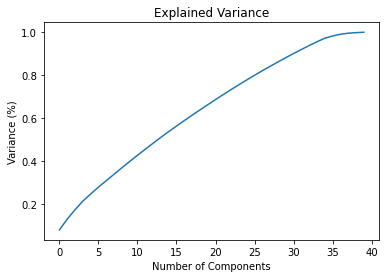

In [141]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # for each component
plt.title('Explained Variance')
plt.show()

#### we can see that 90% of the variance is being explained by 30 components

In [142]:
pca=PCA(n_components=30)
new_data=pca.fit_transform(X_scaled)

principal_x=pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11',
            'PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20','PC-21','PC-22',
                  'PC-23','PC-24','PC-25','PC-26','PC-27','PC-28','PC-29','PC-30'])

In [143]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-21,PC-22,PC-23,PC-24,PC-25,PC-26,PC-27,PC-28,PC-29,PC-30
0,0.330240,0.664202,-2.310021,2.114704,-2.476359,0.202757,-1.263893,0.749724,0.253601,0.025077,...,0.392487,1.608276,0.421878,-0.854269,-0.370078,-1.151342,0.810536,0.220178,0.626010,-0.433947
1,-3.249142,0.797952,-0.749543,0.085099,0.068394,-0.071623,0.993834,-0.169916,0.545522,0.747233,...,1.026433,1.645596,-0.551951,-0.709072,0.718621,0.015024,0.253502,-0.021280,0.154843,0.169820
2,-0.258547,-1.074509,-0.375379,-1.593874,1.722946,-1.028092,-0.882952,0.978114,-0.769722,0.505669,...,0.758097,1.347309,1.044416,-1.594980,0.014772,-1.050931,-0.314426,-0.212582,-1.626192,0.523463
3,0.013697,1.547946,2.704220,-0.342387,1.490924,-2.281014,0.072191,2.731090,-0.435343,0.434433,...,0.181043,-0.439376,-0.424232,-0.963198,-1.309908,0.693948,0.315837,-0.222883,0.939867,-1.063876
4,-2.614735,1.274138,0.032622,-0.635492,3.231689,0.344680,-1.246070,-0.134328,-0.747237,-0.015228,...,-1.076481,0.904425,-0.773449,1.068211,-0.455685,1.152242,-1.626483,0.609667,2.191674,-1.573603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.094031,-0.859480,-0.063134,2.867076,0.240805,0.790150,0.091012,0.389671,-0.132323,-1.097818,...,0.087690,-2.511580,0.444314,0.877058,1.728103,-1.284519,-0.096981,-0.403037,-1.671125,0.004876
996,3.196043,0.190682,-0.657885,2.681118,0.337845,-0.228314,0.314047,1.845453,-0.155241,1.449055,...,-0.666681,-1.173433,-0.239873,0.397433,-1.826914,-2.018553,-1.364934,0.762045,0.175961,-0.573300
997,0.499300,-1.311178,-1.673968,-0.933678,-0.018910,-0.507715,-2.474119,0.850585,-0.751575,0.528018,...,2.083943,-0.590584,0.570643,-0.754924,0.431178,-0.766192,0.772426,-0.517427,-0.520182,0.501577
998,-0.717992,3.740314,-1.312144,0.569500,2.388726,1.041485,-0.743815,-0.138480,-1.201481,0.395291,...,0.502110,1.698798,-0.073827,-1.499977,1.231636,-0.287817,0.716783,1.694168,1.611462,-0.797407


## Lets plot ROC AUC Curve to choose the best model

In [144]:
# Plot ROC/AUC for multiple models without hyperparams tuning

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
gbdt = GradientBoostingClassifier()
sgd= SGDClassifier()

In [145]:
# training with all classifier
lr.fit(x_train,y_train)
rf.fit(x_train,y_train)
dt.fit(x_train,y_train)
kn.fit(x_train,y_train)
gbdt.fit(x_train,y_train)
sgd.fit(x_train,y_train)

print('All models are trained')

All models are trained


In [146]:
# All models score captured
lr.fit(x_test,y_test)
rf.fit(x_test,y_test)
dt.fit(x_test,y_test)
kn.fit(x_test,y_test)
gbdt.fit(x_test,y_test)
sgd.fit(x_test,y_test)

print('All models test score captured')

All models test score captured


## Lets find ROC AUC score

In [147]:
# LogisticRegression
roc_auc_score(y_test,lr.predict(x_test))

0.6611466303322503

In [148]:
# DecisionTreeClassifier
roc_auc_score(y_test,dt.predict(x_test))

1.0

In [149]:
# RandomForestClassifier
roc_auc_score(y_test,rf.predict(x_test))

1.0

In [150]:
# KNeighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.578503301540719

In [151]:
# GradientBoostingClassifier
roc_auc_score(y_test,gbdt.predict(x_test))

1.0

In [152]:
# SGDClassifier
roc_auc_score(y_test,sgd.predict(x_test))

0.6536526569541976

## Lets check ROC AUC curve for the fitted model

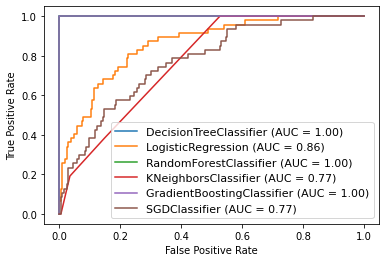

In [153]:
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbdt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(sgd,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

### Using GridSearchCV for hyper parameter tuning on best model (Gradient Bossting Classifier)

In [154]:
# we are tuning three hyperparameters right now, we are passing different values for both parameters
grid_param = {
    'max_depth' : range(2,30,3),              
    'min_samples_leaf' : range (1,30,2),
    'min_samples_split' : range (2,30,2)
}

In [155]:
grid_search = GridSearchCV(estimator=gbdt_clf,
                          param_grid=grid_param,
                          cv=3,
                          n_jobs =-1)

In [156]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 30, 3),
                         'min_samples_leaf': range(1, 30, 2),
                         'min_samples_split': range(2, 30, 2)})

In [157]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 8, 'min_samples_leaf': 7, 'min_samples_split': 10}


In [158]:
gbdt_clf = GradientBoostingClassifier(max_depth =8, min_samples_leaf=7, min_samples_split=10)
gbdt_clf.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=8, min_samples_leaf=7,
                           min_samples_split=10)

In [159]:
gbdt_clf.score(x_test,y_test)

0.836

In [160]:
# After applying hyperparameter tuning still getting approximately same accuracy score.

In [161]:
# Choosing Gradient Boosting Classifier as best model for production as its accuracy and CV value is least than other models.

## Model Saving

In [162]:
# saving the model to local system
filename = 'Insurance Claims- Fraud Detection_model.pickle'
pickle.dump(gbdt_clf,open(filename,'wb'))

In [163]:
# Model has been saved successfully. Let's check by predicting with the loaded model.

## Loading and predicting with the loaded model

In [164]:
# loading the saved model
loaded_model = pickle.load(open(filename,'rb'))

In [165]:
# predicting with the loaded model
predictions = loaded_model.predict(x_test)